# conv 를 사용하지 않습니다

In [2]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
import numpy as np
n_label, count = np.unique(y_train, return_counts = True)

<BarContainer object of 10 artists>

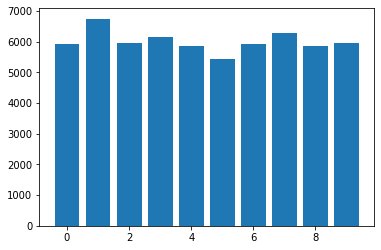

In [22]:
plt.bar(x=n_label,height=count)

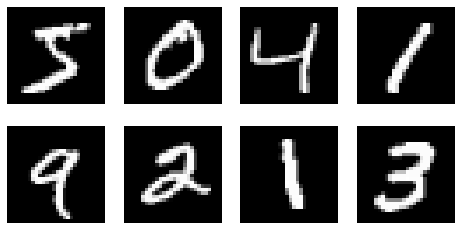

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i], cmap = 'gray')
    plt.axis('off')

In [26]:
# 정규화
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [28]:
# one_hot_encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [30]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000, 10), (10000, 28, 28), (10000, 10))

In [32]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model

In [44]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(20, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy',metrics=['acc'])
model.fit(x_train,y_train,validation_split=0.2,epochs=100,batch_size=400,verbose=1)

Epoch 1/100
120/120 [==============================] - 1s 3ms/step - loss: 2.3715 - acc: 0.1005 - val_loss: 2.2945 - val_acc: 0.0956
Epoch 2/100
120/120 [==============================] - 0s 2ms/step - loss: 2.2905 - acc: 0.1304 - val_loss: 2.2845 - val_acc: 0.1060
Epoch 3/100
120/120 [==============================] - 0s 2ms/step - loss: 2.2807 - acc: 0.1154 - val_loss: 2.2724 - val_acc: 0.1212
Epoch 4/100
120/120 [==============================] - 0s 2ms/step - loss: 2.2687 - acc: 0.1892 - val_loss: 2.2605 - val_acc: 0.1500
Epoch 5/100
120/120 [==============================] - 0s 2ms/step - loss: 2.2564 - acc: 0.1974 - val_loss: 2.2449 - val_acc: 0.2776
Epoch 6/100
120/120 [==============================] - 0s 2ms/step - loss: 2.2411 - acc: 0.2667 - val_loss: 2.2272 - val_acc: 0.2989
Epoch 7/100
120/120 [==============================] - 0s 2ms/step - loss: 2.2220 - acc: 0.3076 - val_loss: 2.2054 - val_acc: 0.3311
Epoch 8/100
120/120 [==============================] - 0s 2ms/step - 

In [43]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.1), loss='categorical_crossentropy',metrics=['acc'])
model.fit(x_train,y_train,validation_split=0.2,epochs=100,batch_size=400,verbose=1)

Epoch 1/100
120/120 [==============================] - 1s 4ms/step - loss: 3.5750 - acc: 0.5631 - val_loss: 0.8183 - val_acc: 0.7405
Epoch 2/100
120/120 [==============================] - 0s 4ms/step - loss: 0.6595 - acc: 0.7997 - val_loss: 0.5833 - val_acc: 0.8102
Epoch 3/100
120/120 [==============================] - 0s 4ms/step - loss: 0.5356 - acc: 0.8361 - val_loss: 0.3577 - val_acc: 0.8914
Epoch 4/100
120/120 [==============================] - 0s 4ms/step - loss: 0.4146 - acc: 0.8775 - val_loss: 0.3263 - val_acc: 0.9037
Epoch 5/100
120/120 [==============================] - 0s 4ms/step - loss: 0.3829 - acc: 0.8864 - val_loss: 0.2668 - val_acc: 0.9207
Epoch 6/100
120/120 [==============================] - 0s 4ms/step - loss: 0.3538 - acc: 0.8944 - val_loss: 0.2202 - val_acc: 0.9351
Epoch 7/100
120/120 [==============================] - 0s 4ms/step - loss: 0.3281 - acc: 0.9028 - val_loss: 0.2565 - val_acc: 0.9263
Epoch 8/100
120/120 [==============================] - 0s 4ms/step - 